In [2]:
import pytesseract
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from scipy import ndimage

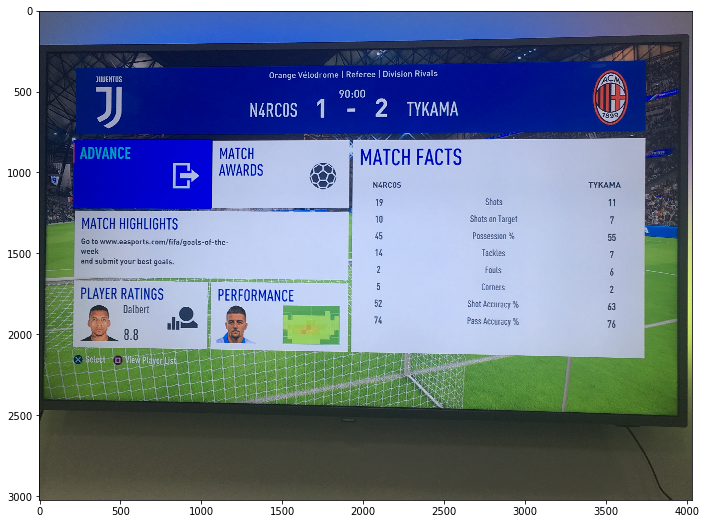

In [34]:
img_original = cv.imread('images/IMG_2217.JPG')
plt.figure(figsize=(16,9))
plt.imshow(cv.cvtColor(img_original,cv.COLOR_BGR2RGB))

In [35]:
img = img_original.copy()
data = pytesseract.image_to_boxes(img)

In [13]:
type(data)

str

In [36]:
data = data.split('\n')

In [37]:
data[1]

'a 2131 0 2236 0 0'

In [38]:
data = [x.split() for x in data]

In [39]:
data[1]

['a', '2131', '0', '2236', '0', '0']

In [40]:
h,w,_ = img.shape

In [41]:
for i in data:
    cv.rectangle(img, (int(i[1]),h-int(i[2])), (int(i[3]), h-int(i[4])), (0,255,255),4)

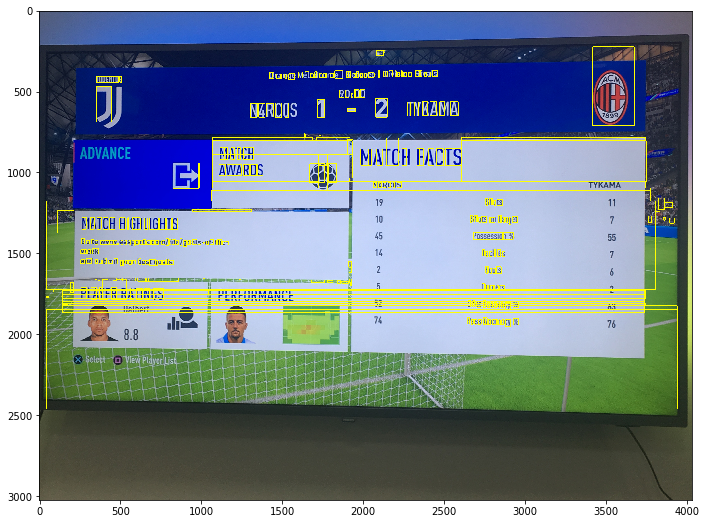

In [42]:
plt.figure(figsize=(16,9))
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [ ]:
## Let's use grayscale

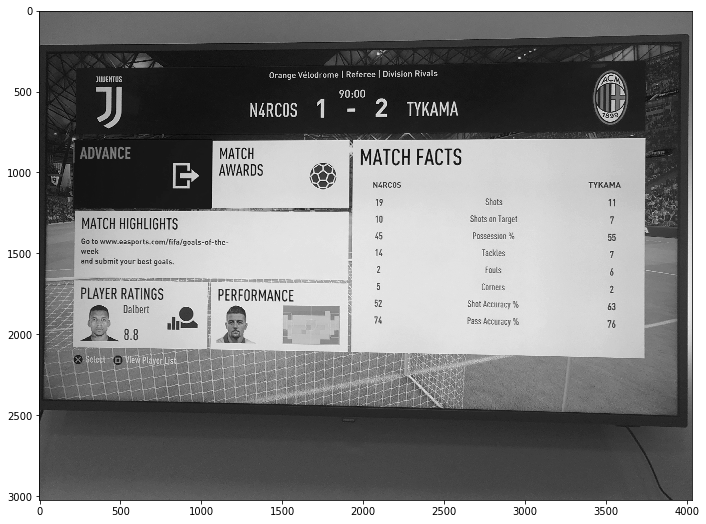

In [50]:
img_gray = cv.cvtColor(img_original, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(16,9))
plt.imshow(img_gray, cmap='gray')

In [51]:
data = pytesseract.image_to_boxes(img_gray)
data = data.split('\n')
data = [x.split() for x in data]

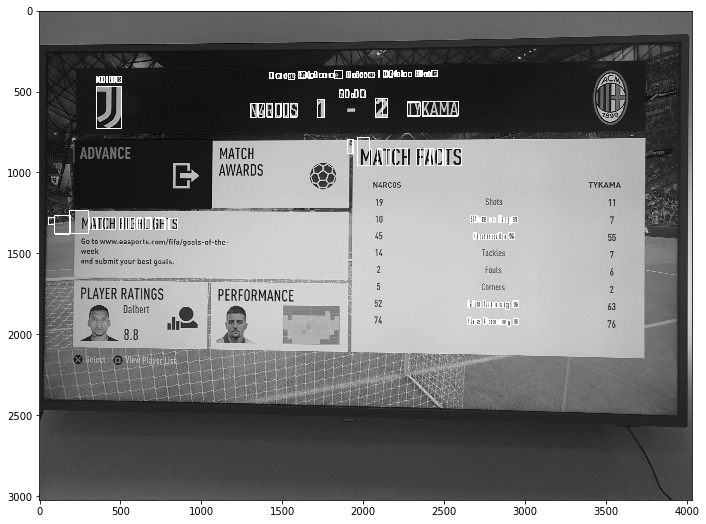

In [52]:
for i in data:
    cv.rectangle(img_gray, (int(i[1]),h-int(i[2])), (int(i[3]), h-int(i[4])), (255,255,255),5)
plt.figure(figsize=(16,9))
plt.imshow(img_gray,cmap='gray')

In [84]:
img_gray = cv.cvtColor(img_original, cv.COLOR_BGR2GRAY)
img_edit = cv.threshold(img_gray, 150, 255, cv.THRESH_BINARY)

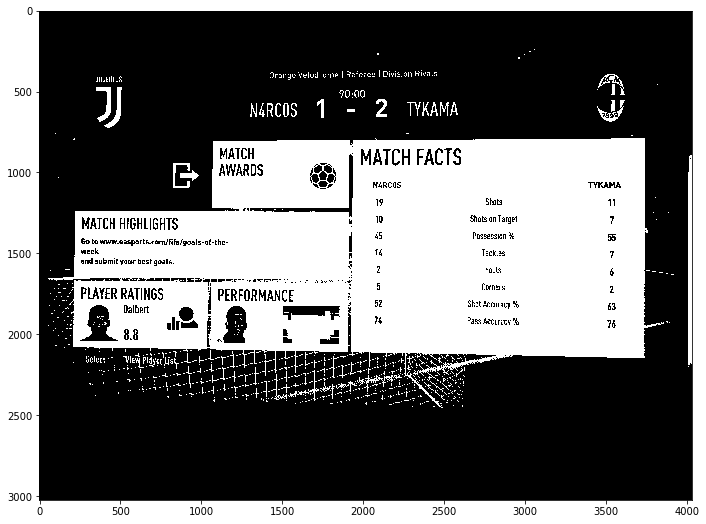

In [85]:
plt.figure(figsize=(16,9))
plt.imshow(img_edit[1],cmap='gray')

In [86]:
data = pytesseract.image_to_boxes(img_edit[1])
data = data.split('\n')
data = [x.split() for x in data]

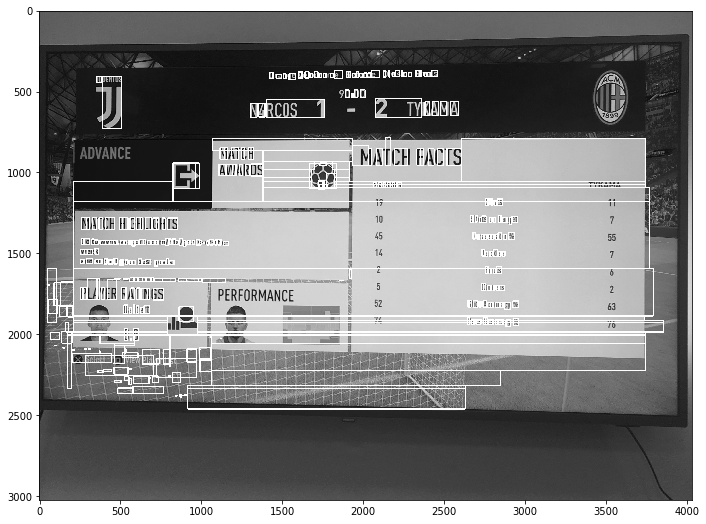

In [87]:
for i in data:
    cv.rectangle(img_gray, (int(i[1]),h-int(i[2])), (int(i[3]), h-int(i[4])), (255,255,255),5)
plt.figure(figsize=(16,9))
plt.imshow(img_gray,cmap='gray')

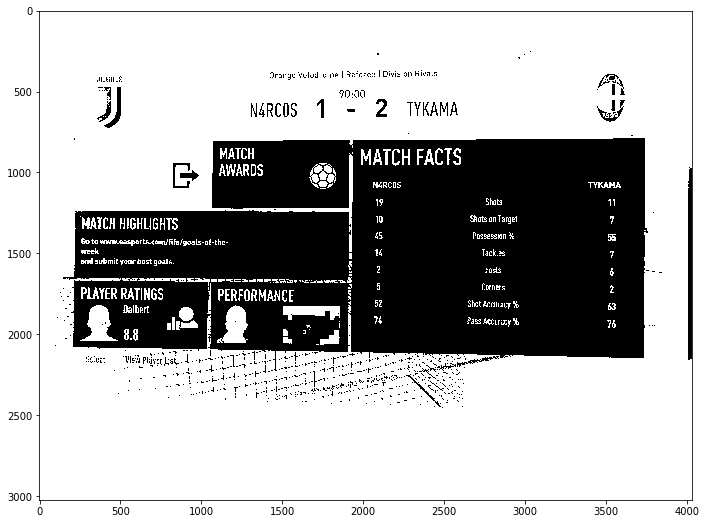

In [103]:
# let's use binary inversion
img_gray = cv.cvtColor(img_original, cv.COLOR_BGR2GRAY)
_,img_edit = cv.threshold(img_gray, 160, 255, cv.THRESH_BINARY_INV)
plt.figure(figsize=(16,9))
plt.imshow(img_edit,cmap='gray')

In [104]:
data = pytesseract.image_to_boxes(img_edit)
data = data.split('\n')
data = [x.split() for x in data]

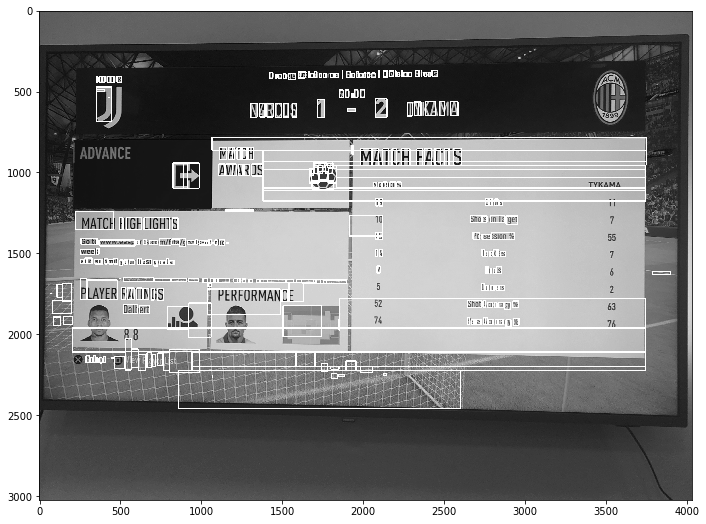

In [105]:
for i in data:
    cv.rectangle(img_gray, (int(i[1]),h-int(i[2])), (int(i[3]), h-int(i[4])), (255,255,255),5)
plt.figure(figsize=(16,9))
plt.imshow(img_gray,cmap='gray')

In [107]:
# line detection and ratate image
img_gray = cv.cvtColor(img_original, cv.COLOR_BGR2GRAY)
_,img_edit = cv.threshold(img_gray, 160, 255, cv.THRESH_BINARY_INV)
lines = cv.HoughLinesP(img_edit, 1, np.pi/180, 100, minLineLength=300, maxLineGap=20)

In [108]:
angle=0
for i in lines:
    x1,y1,x2,y2 = i[0]
    r = np.arctan2(y2-y1,x2-x1)
    angle+=r

In [109]:
avr_ang = angle/len(lines)
avr_degree = avr_ang * 180 / np.pi
print (avr_degree)

0.5507507302315818


In [110]:
from scipy import ndimage

In [111]:
rotated = ndimage.rotate(img_edit,avr_degree)

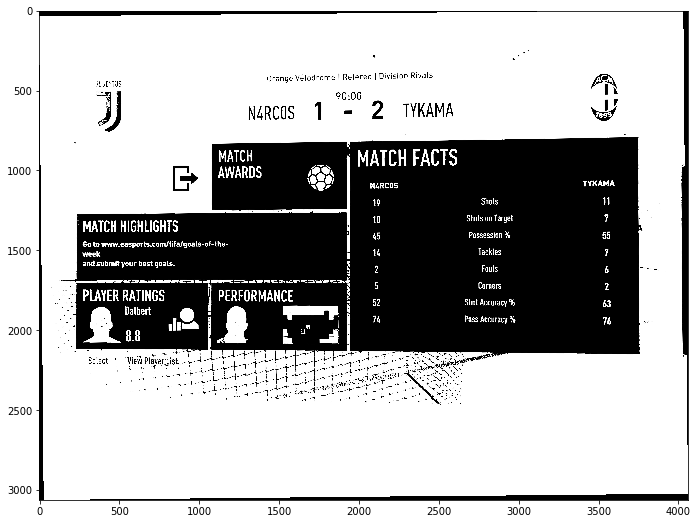

In [112]:
plt.figure(figsize=(16,9))
plt.imshow(rotated,cmap='gray')

In [113]:
data = pytesseract.image_to_boxes(rotated)
data = data.split('\n')
data = [x.split() for x in data]

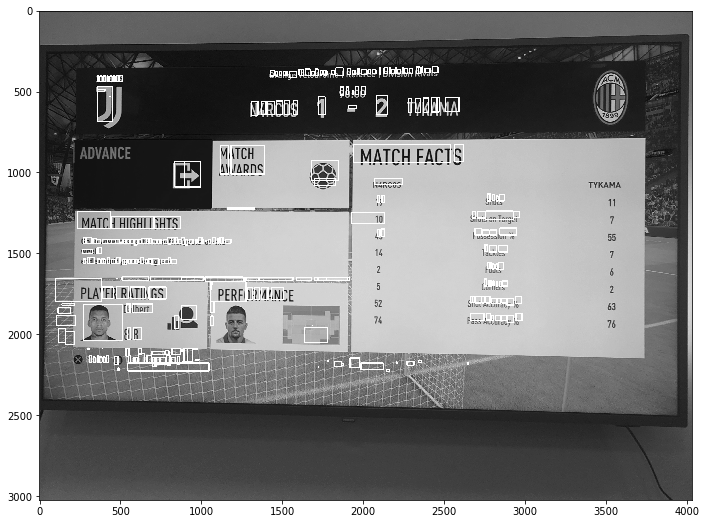

In [114]:
for i in data:
    cv.rectangle(img_gray, (int(i[1]),h-int(i[2])), (int(i[3]), h-int(i[4])), (255,255,255),5)
plt.figure(figsize=(16,9))
plt.imshow(img_gray,cmap='gray')

In [122]:
img_gray = cv.cvtColor(img_original, cv.COLOR_BGR2GRAY)
_,img_inv = cv.threshold(img_gray, 160, 255, cv.THRESH_BINARY_INV)

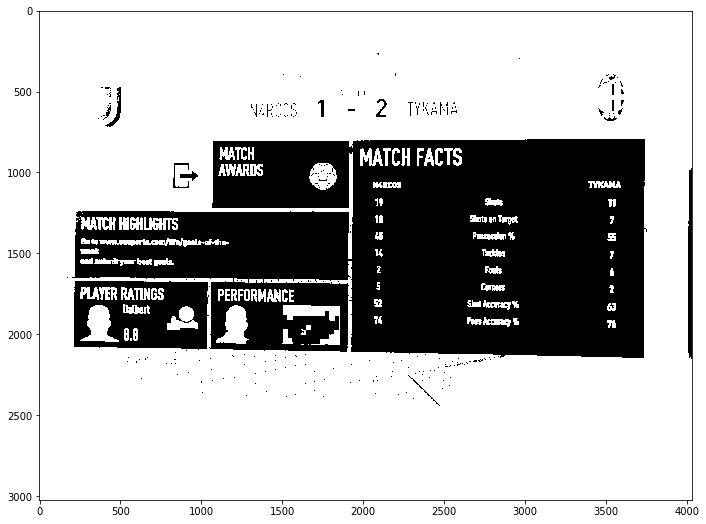

In [123]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5,5))
dilate = cv.morphologyEx(img_inv,cv.MORPH_DILATE,kernel)
plt.figure(figsize=(16,9))
plt.imshow(dilate,cmap='gray')

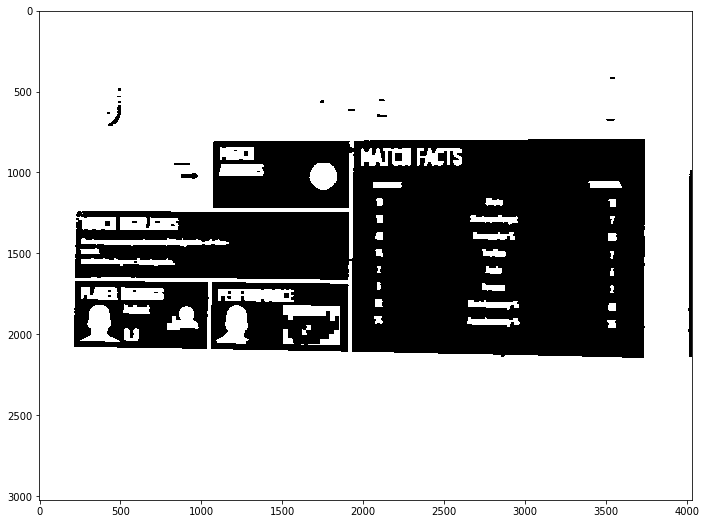

In [124]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (10,5))
connected = cv.morphologyEx(dilate,cv.MORPH_CLOSE,kernel, iterations=2)
plt.figure(figsize=(16,9))
plt.imshow(connected,cmap='gray')

In [175]:
contours, hierarchy = cv.findContours(connected, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
boxes = map(lambda c: cv.boundingRect(c), contours)
#filtered = filter(lambda b: b[2]>20 and b[3]>25, boxes)

In [184]:
for contour in contours:
    print(contour)
    cv.drawContours(img_gray, contour, -1, (0, 255, 0), 6)

[[[   0    0]]

 [[   0 3023]]

 [[4031 3023]]

 [[4031 2141]]

 [[4013 2141]]

 [[4012 2140]]

 [[4012 2118]]

 [[4011 2117]]

 [[4011 2080]]

 [[4010 2079]]

 [[4010 2069]]

 [[4011 2068]]

 [[4011 2064]]

 [[4010 2063]]

 [[4010 1985]]

 [[4009 1984]]

 [[4009 1971]]

 [[4010 1970]]

 [[4010 1855]]

 [[4009 1854]]

 [[4009 1838]]

 [[4010 1837]]

 [[4010 1626]]

 [[4011 1625]]

 [[4011 1620]]

 [[4010 1619]]

 [[4010 1554]]

 [[4011 1553]]

 [[4011 1496]]

 [[4010 1495]]

 [[4010 1485]]

 [[4011 1484]]

 [[4011 1334]]

 [[4012 1333]]

 [[4012 1318]]

 [[4011 1317]]

 [[4011 1304]]

 [[4012 1303]]

 [[4012 1216]]

 [[4013 1215]]

 [[4013 1122]]

 [[4014 1121]]

 [[4014 1117]]

 [[4013 1116]]

 [[4013 1098]]

 [[4014 1097]]

 [[4014 1030]]

 [[4015 1029]]

 [[4015 1026]]

 [[4016 1025]]

 [[4016 1021]]

 [[4015 1020]]

 [[4015 1011]]

 [[4016 1010]]

 [[4016  986]]

 [[4017  985]]

 [[4018  985]]

 [[4019  984]]

 [[4031  984]]

 [[4031    0]]]


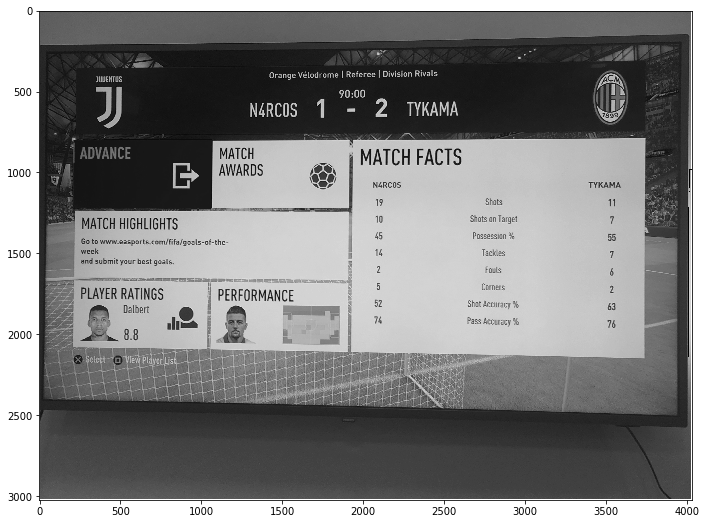

In [185]:
plt.figure(figsize=(16,9))
plt.imshow(img_gray,cmap='gray')